# Exploration

In [90]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import weightedcalcs as wc

In [116]:
import sys
import os
sys.path.append('../src/features')
from build_features import filter_col_with_regex, get_dummies

In [3]:
# read in data 
df = pd.read_csv('../data/raw/20161201_voter_study_group.csv')

In [163]:
df_no_nulls = df.fillna(8)

## Plot weighted votes by candidate

weighted frequency: presvote16post_2016
1.0    0.406
2.0    0.399
3.0    0.027
4.0    0.012
5.0    0.002
6.0    0.016
7.0    0.008
8.0    0.130
Name: weight, dtype: float64


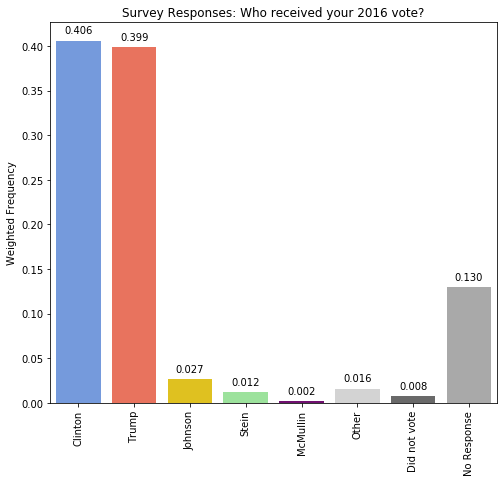

In [167]:
calc = wc.Calculator('weight')
weight = df['weight']
d = calc.distribution(df_no_nulls, 'presvote16post_2016').round(3)#.sort_values(ascending=False)
print('weighted frequency:', d)
freq_list = []
for i in d:
    freq_list.append(i)
freq_list
plt.figure(figsize=(8,7))
clrs = ['cornflowerblue','tomato', 'gold','lightgreen','purple','lightgrey','dimgrey','darkgray']
cand_list = ['Clinton','Trump','Johnson','Stein','McMullin','Other','Did not vote', 'No Response',]
bplot = sns.barplot(x = cand_list, y = freq_list, palette=clrs)
bplot.set_xticklabels(rotation=90, labels= cand_list)
bplot.set_title('Survey Responses: Who received your 2016 vote?')
bplot.set_ylabel('Weighted Frequency')

for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()



In [168]:
climate_freq = calc.distribution(df_no_nulls, 'imiss_l_2016').round(3)
print('weighted frequency:', climate_freq)

weighted frequency: imiss_l_2016
1.0    0.374
2.0    0.235
3.0    0.170
4.0    0.195
8.0    0.025
Name: weight, dtype: float64


[0.374, 0.235, 0.17, 0.195, 0.025]


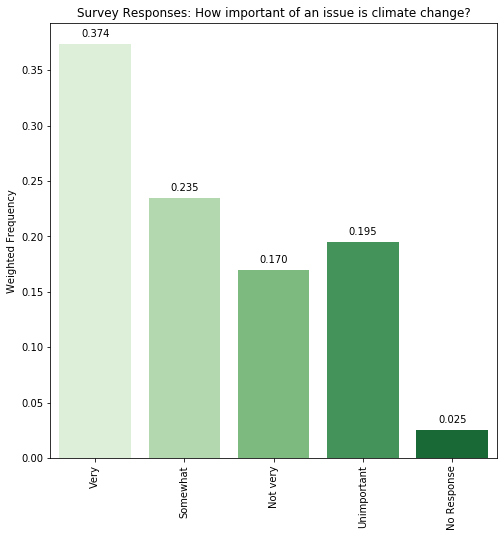

In [178]:
climate_list = []
for i in climate_freq:
    climate_list.append(i)
print(climate_list)
plt.figure(figsize=(8,8))
x = ['Very','Somewhat','Not very','Unimportant','No Response']
bplot = sns.barplot(x = x, y = climate_list, palette='Greens')
bplot.set_xticklabels(rotation=90, labels= x)
bplot.set_title('Survey Responses: How important of an issue is climate change?')
bplot.set_ylabel('Weighted Frequency')
for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()
plt.show()

for one issue, plot the frequency of folks who responded what to it. 

## Community engagement features

In [ ]:
# return list of community engagement column names
col_list = []
for i in range(1, 18):
    col = f'volunteerorg2_{i}_baseline'
    col_list.append(col)
    
# other community engagement fields 
comm_list = ['CIVIC_PARTICIPATION_2016',
             'pew_churatd_2016',
             'volunteer_baseline',
             'volunteerf_baseline',
             'volunteernum_baseline'
            ]

df_predictors = df[(col_list + comm_list)]

# save target subset of dataframe
df_target = pd.DataFrame(df['presvote16post_2016'])

# predictors and target
df_target_predictors = df_target.join(df_predictors)

# correlation coefficients 
df_target_predictors.corr()['presvote16post_2016'].sort_values(ascending=False).head()

In [ ]:
sns.countplot(x=df_target.presvote16post_2016)
sns.xticklabels(df_target.columns)

In [ ]:
# fill null values 
# df = fill_nulls(df)

In [ ]:
# with open('../data/processed/predictors_target.text', 'wb') as f:
#     pickle.dump([X, y], f)